In [3]:
pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Khushi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

import matplotlib.pyplot as plt
from builtins import range,input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np

from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

print("All libraries are imported")

All libraries are imported


In [5]:
#define size to which images are to be resized
IMAGE_SIZE = [250,250]

#training config
epochs = 200
batch_size = 32

#define paths
covid_path = "E:\\PYTHON\\LetsUpgrade\\Capstone_project\\COVID"
noncovid_path = "E:\\PYTHON\\LetsUpgrade\\Capstone_project\\non-COVID"

#use glob to grab images from path .jgp or .jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [6]:
#visualize file variable contents
print("First 5 Covid Files: ", covid_files[0:5])
print("______________________________________________________________________________________________________________________________________________________________")
print("Total Counts: ", len(covid_files))
print("______________________________________________________________________________________________________________________________________________________________")
print("First 5 NonCovid Files: ", noncovid_files[0:5])
print("______________________________________________________________________________________________________________________________________________________________")
print("Total Counts: ", len(noncovid_files))

First 5 Covid Files:  ['E:\\PYTHON\\LetsUpgrade\\Capstone_project\\COVID\\Covid (1).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_project\\COVID\\Covid (10).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_project\\COVID\\Covid (100).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_project\\COVID\\Covid (1000).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_project\\COVID\\Covid (1001).png']
______________________________________________________________________________________________________________________________________________________________
Total Counts:  1252
______________________________________________________________________________________________________________________________________________________________
First 5 NonCovid Files:  ['E:\\PYTHON\\LetsUpgrade\\Capstone_project\\non-COVID\\Non-Covid (1).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_project\\non-COVID\\Non-Covid (10).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_project\\non-COVID\\Non-Covid (100).png', 'E:\\PYTHON\\LetsUpgrade\\Capstone_projec

In [7]:
#FETCH IMAGES AND CLASS LABELS FROM FILES
covid_labels = []                          #empty list for append the labels
noncovid_labels = []                       

covid_images = []                           #empty list for append the images
noncovid_images = []

for i in range(len(covid_files)):
    image = cv2.imread(covid_files[i])              #reading the file
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #arrange format as per deep learning libraries
    image = cv2.resize(image,(250,250))             #resize as per model
    covid_images.append(image)                      #append image
    covid_labels.append('CT_COVID')                 #append class label
    
for i in range(len(noncovid_files)):
    image = cv2.imread(noncovid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(250,250))
    covid_images.append(image)
    covid_labels.append('CT_NonCOVID')

In [10]:
#define the function for plotting the image

def plot_images_from_datasets(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))
    
    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()
        
    plt.suptitle(title, fontsize = 20)
    plt.tight_layout(pad = 0.2, rect = [0,0,1,0.9])
    plt.show()

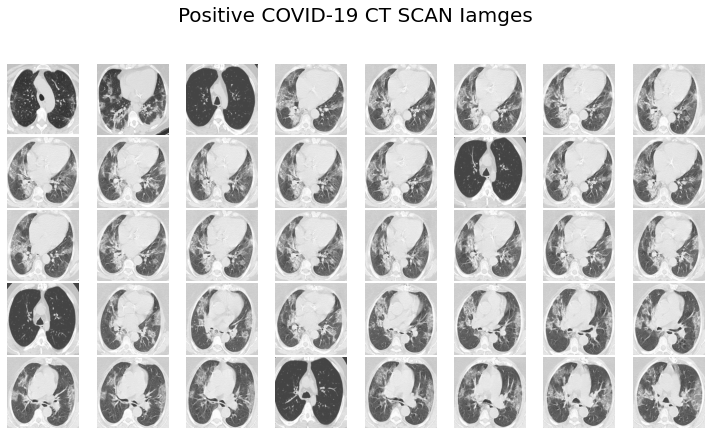

IndexError: list index out of range

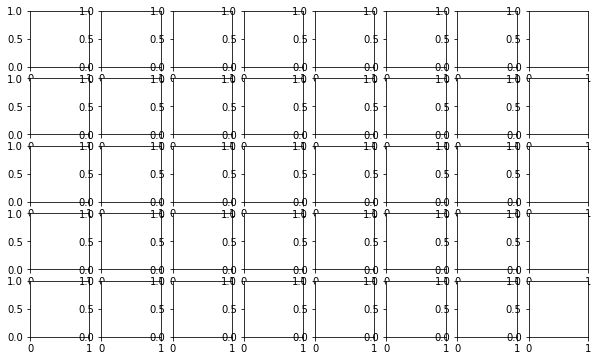

In [11]:
#Plotting the positive COVID and negative COVID dataset

plot_images_from_datasets(covid_images, 'Positive COVID-19 CT SCAN Iamges')
plot_images_from_datasets(noncovid_images, 'Negative COVID-19 CT SCAN Iamges')

#Convert to array and normalize to interval

covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

In [12]:
#SPLIT THE DATASET INTO TRAIN,TEST AND CONCATENATE THE DATASETS

#split into training and testing sets

#covid positive
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(covid_images, covid_labels, test_size = 0.2)

#covid negative
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(noncovid_images, noncovid_labels, test_size = 0.2)

#Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis = 0) 
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis = 0) 
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis = 0) 
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis = 0) 

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [3]:
#load saved model
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

model = load_model('mymymodel.h5')
y_pred = model.predict(X_test, batch_size = batch_size)

#Let's look the 1 to 50 images

prediction = y_pred[1:50]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
    else:
        plt.title('%.2f' % (1-probability[1]*100) + '% NonCOVID')
    plt.imshow(X_test[index])
    plt.show()

ValueError: Unknown layer: TFDistilBertModel. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.